In [293]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

In [294]:
churn = pd.read_csv('cusmodel.csv')
churn.head()
churn.drop('Unnamed: 0', axis =1, inplace = True)

In [295]:
churn.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.000000,0.115423,0.001275,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,0.464789,0.385075,0.215867,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,0.014085,0.354229,0.010310,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0.619718,0.239303,0.210241,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,0.014085,0.521891,0.015330,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [296]:
churn.drop('gender_Female', axis=1, inplace =True)
churn.drop('gender_Male', axis=1, inplace =True)
churn

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.000000,0.115423,0.001275,0,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0,0.464789,0.385075,0.215867,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0,0.014085,0.354229,0.010310,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0.619718,0.239303,0.210241,0,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,0.014085,0.521891,0.015330,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0.323944,0.662189,0.227521,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7028,0,1.000000,0.845274,0.847461,0,0,1,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7029,0,0.140845,0.112935,0.037809,0,0,1,0,1,1,...,0,1,0,0,0,1,0,0,1,0
7030,1,0.042254,0.558706,0.033210,1,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [297]:
x = churn.drop('Churn', axis = 1)
y = churn['Churn']

In [298]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25, random_state=42)

# Running with default random forest hyperparameter model - AUC achieves 0.81

In [299]:
model_rf = RandomForestClassifier(random_state = 42)

In [300]:
model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [301]:
model_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [302]:
y_pred = model_rf.predict(x_test)

In [303]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1300
           1       0.61      0.49      0.54       458

    accuracy                           0.78      1758
   macro avg       0.72      0.69      0.70      1758
weighted avg       0.77      0.78      0.78      1758



In [304]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1157  143]
 [ 235  223]]


In [305]:
print(f'model score on training data: {model_rf.score(x_train, y_train)}')
print(f'model score on testing data: {model_rf.score(x_test, y_test)}')
# Overfitting

model score on training data: 0.997535077739856
model score on testing data: 0.7849829351535836


In [306]:
import sklearn.metrics as metrics
#first method to calculate AUC
y_pred_proba = model_rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('AUC for random forest before hyperparameter tunning is ', auc)

AUC for random forest before hyperparameter tunning is  0.8114200537453813


In [307]:
# Second method to calculate AUC
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)

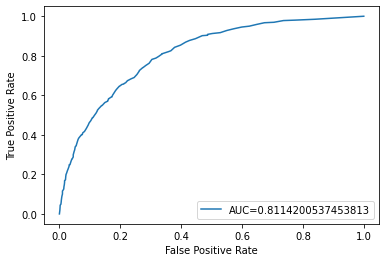

In [308]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [309]:
print(f'AUC of RandomForest is {roc_auc}')

AUC of RandomForest is 0.8114200537453813


### Gradient Boosting - AUC achieves 0.832

In [310]:
from sklearn.ensemble import GradientBoostingClassifier

In [311]:
model_gbc = GradientBoostingClassifier(random_state = 42)

In [312]:
model_gbc.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [313]:
y_predict = model_gbc.predict(x_test)

In [314]:
model_gbc.score(x_test,y_test)

0.7878270762229806

In [315]:
print(classification_report(y_test,y_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1300
           1       0.62      0.48      0.54       458

    accuracy                           0.79      1758
   macro avg       0.73      0.69      0.70      1758
weighted avg       0.78      0.79      0.78      1758



In [316]:
print(confusion_matrix(y_test,y_predict))

[[1167  133]
 [ 240  218]]


In [317]:
print(f'model score on training data: {model_gbc.score(x_train, y_train)}')
print(f'model score on testing data: {model_gbc.score(x_test, y_test)}')

model score on training data: 0.8320060675009481
model score on testing data: 0.7878270762229806


In [318]:
y_pred_prob = model_gbc.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.auc(fpr,tpr)

Text(0, 0.5, 'True Positive Rate')

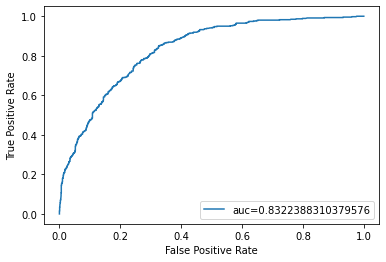

In [319]:
plt.plot(fpr,tpr, label='auc='+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [320]:
print(f'AUC of GBC is ={auc}')

AUC of GBC is =0.8322388310379576


## Logistic Regression - AUC achieves 0.834

In [321]:
from sklearn.linear_model import LogisticRegression

In [322]:
model_lr = LogisticRegression(random_state = 42)

In [323]:
model_lr.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [324]:
y_pr = model_lr.predict(x_test)
model_lr.score(x_test,y_test)

0.7923777019340159

In [325]:
print(classification_report(y_test, y_pr, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1300
           1       0.62      0.52      0.56       458

    accuracy                           0.79      1758
   macro avg       0.73      0.70      0.71      1758
weighted avg       0.78      0.79      0.79      1758



In [326]:
print(f'model score on training data: {model_lr.score(x_train, y_train)}')
print(f'model score on testing data: {model_lr.score(x_test, y_test)}')

model score on training data: 0.8056503602578687
model score on testing data: 0.7923777019340159


In [327]:
import sklearn.metrics as metrics
y_pred_prob = model_lr.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.auc(fpr,tpr)

Text(0, 0.5, 'True Positive Rate')

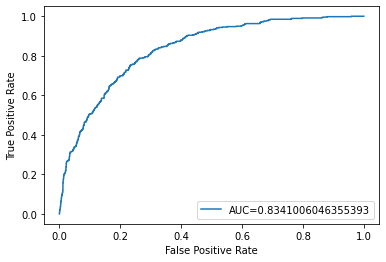

In [328]:
plt.plot(fpr,tpr, label = 'AUC=' + str(auc))
plt.legend(loc = 4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Logistic Regression hyperparameter tunning - AUC 0.8345

In [329]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [330]:
logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(x_test, y_test)
print("Best Parameters: ", grid_search.best_params_)
warnings.filterwarnings("ignore", category=DeprecationWarning, module="sklearn")

Best Parameters:  {'C': 100, 'penalty': 'l1', 'solver': 'saga'}


In [331]:
model_lr = LogisticRegression(random_state = 42, C= 10, penalty = 'l1', solver = 'saga')
model_lr.fit(x_train,y_train)
y_pred_prob = model_lr.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.auc(fpr,tpr)
auc

0.8345339267719181

# Running with the best hyperparameter model by RandomSearchCV - AUC achieves 0.82

In [332]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from pprint import pprint
# Number of trees in random forest
n_estimators = [20,30,40,50,60,70,80,90,100,200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in (5,6,7,8, 80,90,100)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 8, 12]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 6, 7, 8, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3, 4, 5],
 'min_samples_split': [2, 5, 10, 8, 12],
 'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100, 200]}


In [333]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=3, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(x_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [334]:
rf_random.best_params_

{'n_estimators': 40,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [335]:
rf_model = RandomForestClassifier(random_state = 42,n_estimators=40, min_samples_split = 8, 
                                  min_samples_leaf = 3, max_features = 'sqrt',max_depth = 90, bootstrap = True)

In [336]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=90, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=8, n_estimators=40, random_state=42)

In [337]:
y_pre = rf_model.predict(x_test)

In [338]:
print(classification_report(y_test,y_pre, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1300
           1       0.65      0.49      0.56       458

    accuracy                           0.80      1758
   macro avg       0.74      0.70      0.71      1758
weighted avg       0.79      0.80      0.79      1758



In [339]:
y_proba = rf_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_proba)
auc = metrics.roc_auc_score(y_test, y_proba)
print('AUC for random forest after Random Search CV hyperparameter tunning is ', auc)

AUC for random forest after Random Search CV hyperparameter tunning is  0.8264049378569029


In [340]:
print(f'model score on training data: {rf_model.score(x_train, y_train)}')
print(f'model score on testing data: {rf_model.score(x_test, y_test)}')

model score on training data: 0.8754266211604096
model score on testing data: 0.7969283276450512


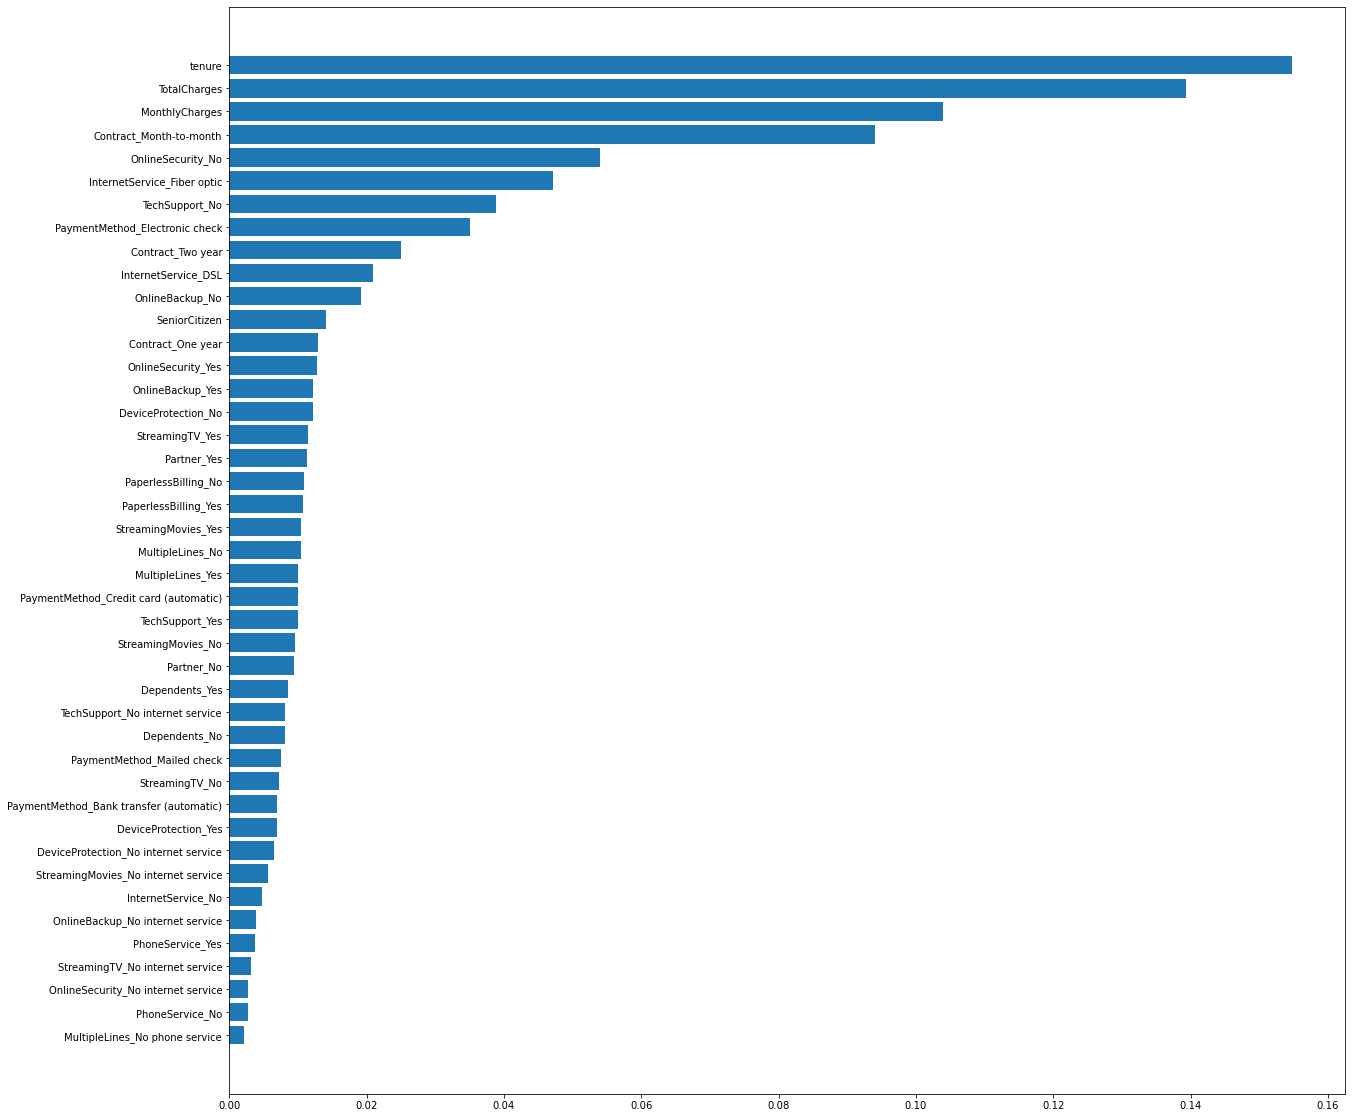

In [341]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(20,20))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])

In [342]:
x1 = churn.drop('PhoneService_Yes', axis = 1)
x1 = x1.drop('PhoneService_No', axis =1)
x1 = x1.drop('Churn', axis =1)
y = churn['Churn']
X_N, X_T, Y_N, Y_T = train_test_split(x1,y,test_size=.25, random_state=42)

In [343]:
rf_model.fit(X_N, Y_N)

RandomForestClassifier(max_depth=90, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=8, n_estimators=40, random_state=42)

In [366]:
Y_P = rf_model.predict(X_T)
print(classification_report(Y_T,Y_P, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1300
           1       0.64      0.49      0.55       458

    accuracy                           0.80      1758
   macro avg       0.74      0.70      0.71      1758
weighted avg       0.78      0.80      0.79      1758



In [345]:
print(f'model score on training data: {rf_model.score(X_N, Y_N)}')
print(f'model score on testing data: {rf_model.score(X_T, Y_T)}')

model score on training data: 0.8782707622298066
model score on testing data: 0.7952218430034129


## Haperparameter Tunning DridSearchCV -- AUC achieves 0.83

In [346]:
''' 
param_grid = {
    'bootstrap' : [True],
    'max_depth' : [80,90,100,110],
    'max_features' : ['auto','squrt'],
    'min_samples_leaf' : [3,4,5],
    'min_samples_split' : [8,10,12],
    'n_estimators':[200,300,1000]
}


rf = RandomForestClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv=3, verbose=3, return_train_score=True)
'''

" \nparam_grid = {\n    'bootstrap' : [True],\n    'max_depth' : [80,90,100,110],\n    'max_features' : ['auto','squrt'],\n    'min_samples_leaf' : [3,4,5],\n    'min_samples_split' : [8,10,12],\n    'n_estimators':[200,300,1000]\n}\n\n\nrf = RandomForestClassifier(random_state=42)\nfrom sklearn.model_selection import GridSearchCV\ngrid_search = GridSearchCV(estimator = rf, param_grid = param_grid,\n                          cv=3, verbose=3, return_train_score=True)\n"

In [347]:
'''param_grid = {'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 200}
 '''

"param_grid = {'bootstrap': True,\n 'max_depth': 80,\n 'max_features': 'auto',\n 'min_samples_leaf': 5,\n 'min_samples_split': 12,\n 'n_estimators': 200}\n "

In [348]:
md_rf = RandomForestClassifier(random_state = 42, bootstrap= True,
                               max_depth= 80,max_features= 'auto',min_samples_leaf= 5,
                               min_samples_split= 12,n_estimators= 200)


In [349]:
md_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=80, min_samples_leaf=5, min_samples_split=12,
                       n_estimators=200, random_state=42)

In [350]:
y_pred1=md_rf.predict(x_test)

In [351]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1300
           1       0.66      0.48      0.56       458

    accuracy                           0.80      1758
   macro avg       0.75      0.70      0.72      1758
weighted avg       0.79      0.80      0.79      1758



In [352]:
y_p_proba = md_rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_p_proba)
auc = metrics.roc_auc_score(y_test, y_p_proba)
print('AUC for random forest after hyperparameter tunning is ', auc)

AUC for random forest after hyperparameter tunning is  0.8299630500503863


### Making the imbalanced data to balanced data by using SMOTEENN

In [353]:
from imblearn.combine import SMOTEENN

In [354]:
sm = SMOTEENN()

In [355]:
x_resampled, y_resampled =sm.fit_resample(x,y)

In [356]:
x_retrain, x_retest, y_retrain, y_retest = train_test_split(x_resampled, y_resampled)

In [357]:
remodel_rf = RandomForestClassifier(random_state = 42)

In [358]:
remodel_rf.fit(x_retrain, y_retrain)

RandomForestClassifier(random_state=42)

In [359]:
y_repred = remodel_rf.predict(x_retest)

In [360]:
print(confusion_matrix(y_retest,y_repred))

[[671  37]
 [ 10 806]]


In [361]:
print(classification_report(y_retest,y_repred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       708
           1       0.96      0.99      0.97       816

    accuracy                           0.97      1524
   macro avg       0.97      0.97      0.97      1524
weighted avg       0.97      0.97      0.97      1524



In [362]:
md_rf.fit(x_retrain,y_retrain)

RandomForestClassifier(max_depth=80, min_samples_leaf=5, min_samples_split=12,
                       n_estimators=200, random_state=42)

In [363]:
y_repred1 = md_rf.predict(x_retest)

In [364]:
print(classification_report(y_retest,y_repred1))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       708
           1       0.93      0.96      0.95       816

    accuracy                           0.94      1524
   macro avg       0.94      0.94      0.94      1524
weighted avg       0.94      0.94      0.94      1524



In [365]:
print(confusion_matrix(y_retest,y_repred1))

[[650  58]
 [ 33 783]]
[CV 2/3] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=70;, score=(train=-0.138, test=-0.207) total time=   0.3s
[CV 3/3] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=12, n_estimators=50;, score=(train=-0.191, test=-0.188) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=(train=-0.175, test=-0.196) total time=   0.2s
[CV 3/3] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=(train=-0.193, test=-0.187) total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=60;, score=(train=-0.140, test=-0.197) total time=   0.3s
[CV 2/3] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=12, n

[CV 3/3] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=70;, score=(train=-0.140, test=-0.192) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=20;, score=(train=-0.139, test=-0.193) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=(train=-0.159, test=-0.199) total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=30;, score=(train=-0.055, test=-0.204) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=90;, score=(train=-0.146, test=-0.197) total time=   0.4s
[CV 3/3] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=60;, score=(

[CV 1/3] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=40;, score=(train=-0.102, test=-0.191) total time=   0.2s
[CV 1/3] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=12, n_estimators=50;, score=(train=-0.191, test=-0.204) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=20;, score=(train=-0.135, test=-0.206) total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=(train=-0.167, test=-0.204) total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=30;, score=(train=-0.057, test=-0.216) total time=   0.1s
[CV 1/3] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=60;, score

[CV 1/3] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=70;, score=(train=-0.146, test=-0.196) total time=   0.3s
[CV 2/3] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=12, n_estimators=50;, score=(train=-0.182, test=-0.208) total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=(train=-0.164, test=-0.192) total time=   0.3s
[CV 1/3] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70;, score=(train=-0.159, test=-0.196) total time=   0.3s
[CV 1/3] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=30;, score=(train=-0.190, test=-0.200) total time=   0.1s
[CV 3/3] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=12, n_estimators=40;, score=(t